## Project 9: Root Finding

### Abstract & description:

For this project, we're exploring algorithms for finding roots of arbitrary functions. Newton method will be the technique discussed in this project. In order to show its application, we decided to solve a transcendental equation.
Why? Because any time we try to solve an algebraic problem and end up with a transcendental equation you can find yourself with root finding as the only viable means of extracting answers. As an example, we picked the Swing Ride problem Researches have shown that solving for the angle is impossible with normal algebraic techniques.
After applying, Newton Method's algorithm, we ended up with an angle of approximately 74 degrees. We used brentq to confirm our results. Brentq is an integrated function that does the same job as the Newton method, except it demands the user to give some reasonable boundaries where the root can be found. 

### Algorithm and Discussion

#### Newton Method:

Let's first consider the slope definition,
$$m=\frac{y_2-y_1}{x_2-x_1}$$


If we consider y1 =0 (on the x-axis) and reorganize the equation as it is in the next line, we can keep iterating as the slopes keep bringing us closer and closer to the actual answer. 


$$x_{1}=x_{0}-{\frac {f(x_{0})}{f'(x_{0})}}\,$$

$$x_{n+1}=x_{n}-{\frac {f(x_{n})}{f'(x_{n})}}\,$$


#### Swing Ride:
Steps: 

Write out the momentum principle for a rider.

1. Assume the mount point of the chain is 3m from the axis and the chain is 5m long. Assume the ride has a period of rotation of 3 sec.

2. Find a transcendental equation that you can solve to get the angle of the swing.

3. Use Newton's Method to find the solution

4. Use the scipy.optimize brentq function to check your result.

Here is a rough diagram of the situation:

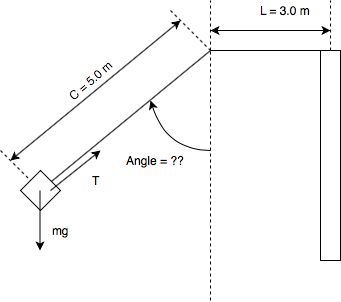

In [164]:
from IPython.display import Image
Image(filename='Swing.png')



Of course the momentum principle says:

$$\frac{d\vec{p}}{dt} = \vec{F}_{\rm net}$$
Which, if you break it down into $x$ and $y$ componenets gives:

$$ \frac{m v^2}{R} = T \sin \theta $$
(where $\theta$ is the unknown angle between the vertical and the swing chain) and

$$ 0 = T \cos \theta - m g $$
Also, from the geometry:

$$ R = L + C \sin \theta $$


==> $tan(\theta) = \frac{v^2}{l+csin(\theta)}$


* L = 3

* C =5

* T = 3 

and


$v = \frac{2\pi r}{T}$

Final development of the formula:$$tan(\theta) =(\frac{2\pi}{3})^2  (\frac{3+5sin(\theta)}{g})$$
$$f(\theta) = tan(\theta) - (\frac{2\pi}{3})^2  (\frac{3+5sin(\theta)}{g}) = 0$$
$$f'(\theta) = \frac{1}{cos^2(\theta)} - \frac{20\pi^2 cos(\theta)}{9g})$$


Since we have the function and its derivative, we can find the root.


### Implementation/Code

In [178]:
%pylab inline
import numpy as np


Populating the interactive namespace from numpy and matplotlib


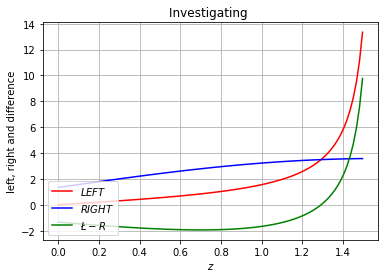

In [179]:
N=100
theta=linspace(0,pi/2.1,N)
theta0 = pi/2
def leftS(theta):
    return tan(theta)

def rightS(theta,g=9.8):
    return ((2*pi/3)**2)*((3+5*sin(theta))/g)

def f(theta,g=9.8):
    return leftS(theta)-rightS(theta,g=9.8)

grid()
title("Investigating ")
ylabel("left, right and difference")
xlabel("$z$")
plot(theta,leftS(theta),'r-',label='$LEFT$')
plot(theta, rightS(theta),'b-',label='$RIGHT$')
plot(theta, f(theta),'g-', label='$\L-R$')
legend(loc=3)

In [180]:
def fp(theta,g=9.8):
    """
    We need a function to evaluate the derivative of f(z) for Newton's method.
    """
    return (1/(cos(theta)**2))-((20*pi*pi)/9)*(cos(theta)/9.8)

def newtonsMethod(f, fp, theta0, eps=1e-15, Nmax=100, showCount=False):
    """
    Very simple implementation of Newton's Method.
    Try to find a zero of 'f' near zi to within eps.
    Don't use up over Nmax iterations
    """

    theta=theta0        # start at zi
    y=f(theta)      # evaluate y
    count=0     # start count at zero
    
    while (abs(y)>eps) and count<Nmax:
        dtheta=y/fp(theta)  # evaluate dz
        theta=theta-dtheta      # update z
        y=f(theta)      # update y
        count += 1  # update count
        print(theta)
    if count>=Nmax:
        raise RuntimeError("Ack! I can't find a zero.")
    elif showCount:
        print( "Found root", theta, "in", count, "iterations. y=", y)
        
    return theta

theta = newtonsMethod(f, fp, pi/2.1, showCount=True)
print("=>(in degree)",theta * 180/pi)

1.4413867532990936
1.3724069431100898
1.315599121956062
1.2941303656525984
1.2920922876964078
1.292076482104258
1.292076481167171
Found root 1.292076481167171 in 7 iterations. y= 0.0
=>(in degree) 74.03052917899349


In [181]:
from scipy.optimize import brentq
print ("ANGLE OBTAINED: ",brentq(f, 1.0, 1.4)," or \n =>(in degree)",brentq(f, 1.0, 1.4)*180/pi )


ANGLE OBTAINED:  1.2920764811673036  or 
 =>(in degree) 74.03052917900109


### Results

Angle obtained using N.M: 1.292076481167171


* in Degree: 74.03052917899349 degree


Angle obtained using brentq: 1.2920764811673036 rad


* in Degree: 74.03052917900109  degree


As one can observe, the results obtained are very close to one another. A simple way to certify this, would be to calculate the error. 

To do so, we will use the following formula:

$$ Error = \frac{Angle_br - Angle_nm}{Angle_br} x 100 $$


$$ Error = \frac{1.2920764811673036 - 1.292076481167171}{1.2920764811673036} x 100 $$


The error is of 1.0259503293526723e-11 which is pretty small and very negligible at this scale. 

### Conclusion


Altogether, we have shown how to solve for the roots of a transcendental equation using a computer. The computer allows us to go through many iterations in a blink of an eye. Newton method is a very useful tool for solving any type of transcendental equation, especially when you need to take care of thousands of iterations. On the other hand, Python has a special function called brentq which makes you decide of a range that you feel like the root is going to be in. In our case, we used the first graph we plotted in order to decide. Picking 1.0 and 1.4 gave us what we expected.